In [5]:
!pip install sklearn

In [140]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [141]:
mydata =  pd.read_csv('~/Desktop/562/NY Property Data Full.csv')

/Users/kaichenchan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [161]:
mydata['Unnamed: 0']

0                0
1                1
2                2
3                3
4                4
5                5
6                6
7                7
8                8
9                9
10              10
11              11
12              12
13              13
14              14
15              15
16              16
17              17
18              18
19              19
20              20
21              21
22              22
23              23
24              24
25              25
26              26
27              27
28              28
29              29
            ...   
1070964    1070964
1070965    1070965
1070966    1070966
1070967    1070967
1070968    1070968
1070969    1070969
1070970    1070970
1070971    1070971
1070972    1070972
1070973    1070973
1070974    1070974
1070975    1070975
1070976    1070976
1070977    1070977
1070978    1070978
1070979    1070979
1070980    1070980
1070981    1070981
1070982    1070982
1070983    1070983
1070984    1070984
1070985    1

In [165]:
#mydata = mydata.drop(['Unnamed: 0'], axis = 1)
mydata

,RECORD,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,ZIP,...,r9_b,r1_all,r2_all,r3_all,r4_all,r5_all,r6_all,r7_all,r8_all,r9_all
0,1,500.0,1046.0,51.0,80.0,3.5,21400000.0,4225500.0,9630000.0,10004.0,...,9.587197,0.194178,8.734992,5.135150,0.794076,24.998449,12.059259,0.738596,33.228287,19.524640
1,2,27.0,100.0,20.0,30.0,1.0,193800000.0,14310000.0,87210000.0,10004.0,...,2066.372457,340.626959,537.912266,1106.802329,520.908890,575.683130,971.983960,1295.641746,2046.241418,4208.235070
2,3,709.0,564.0,709.0,564.0,3.0,104686000.0,39008700.0,47108700.0,10004.0,...,0.558275,1.242374,0.435986,0.299026,9.587868,2.354677,1.325213,4.725613,1.658508,1.136945
3,4,793.0,551.0,85.0,551.0,2.0,39200000.0,15255000.0,17640000.0,10004.0,...,2.677267,0.425746,1.393877,1.434013,3.431416,7.862068,6.637162,1.619408,5.302368,5.452341
4,5,323.0,1260.0,89.0,57.0,1.0,272300000.0,121050000.0,122535000.0,10004.0,...,343.390962,3.175145,89.390570,183.929047,29.233285,575.963618,972.457536,12.077290,340.045575,699.326923
5,6,496.0,76.0,25.0,29.0,1.0,10600000.0,4770000.0,4770000.0,10004.0,...,93.534955,1.334442,24.348756,50.099732,12.436810,158.809139,268.133506,5.075812,92.623717,190.486994
6,7,180.0,370.0,16.0,19.0,1.0,8489997.0,3820499.0,3820499.0,10004.0,...,178.665243,0.604954,46.509629,95.697699,5.638087,303.348343,512.173639,2.301062,176.924649,363.857609
7,8,362.0,177.0,37.0,227.0,3.0,28100000.0,11070000.0,12645000.0,10004.0,...,7.134500,2.081198,5.571699,3.821422,16.980547,31.813772,17.904801,7.916248,21.194984,14.529643
8,9,90.0,101.0,90.0,95.0,50.0,3944762.0,636093.0,1775143.0,10004.0,...,0.059032,2.059425,0.768358,0.031619,6.877691,1.795765,0.060639,7.833428,2.922867,0.120222
9,10,90.0,101.0,90.0,95.0,50.0,5700930.0,919276.0,2565419.0,10004.0,...,0.085313,2.976260,1.110423,0.045696,9.939578,2.595224,0.087636,11.320793,4.224098,0.173743


In [167]:
#1st z scale
test = mydata.loc[ :,'r1_zip5':'r9_all'].drop('ZIP3',axis =1)

for i in range(len(test.columns)):
    test.iloc[:,i] = preprocessing.scale(test.iloc[:,i])
    
test.head()


,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,...,r9_b,r1_all,r2_all,r3_all,r4_all,r5_all,r6_all,r7_all,r8_all,r9_all
0,-0.246735,0.460198,0.129349,-0.090204,0.210196,0.057093,-0.127312,0.236806,0.069188,-0.132403,...,0.124760,-0.163248,0.403708,0.129734,-0.012336,0.229363,0.070099,-0.029386,0.471730,0.159042
1,41.859721,35.122988,49.628023,8.764993,5.824511,7.979054,23.452201,17.899306,26.105987,28.818893,...,30.007093,68.803554,28.022783,34.692823,31.145665,5.492489,6.154602,145.538236,29.936496,36.120867
2,-0.117089,-0.083413,-0.087942,0.059514,-0.020660,-0.031492,-0.054710,-0.040192,-0.045109,-0.043262,...,-0.006418,0.049101,-0.029437,-0.021992,0.514465,0.012947,0.002061,0.418818,0.009639,0.001176
3,-0.218094,-0.020668,-0.036946,-0.045302,0.035488,0.012346,-0.111273,-0.008220,-0.018285,-0.112710,...,0.024368,-0.116336,0.020557,0.013616,0.145656,0.065584,0.035731,0.069631,0.062974,0.038225
4,0.121966,5.743394,8.162683,0.393986,5.827371,7.982962,0.079160,2.928871,4.294802,0.121106,...,4.974482,0.440653,4.613323,5.739113,1.691343,5.495170,6.157604,1.245263,4.962659,5.995428


In [168]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])



print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.48116794 0.24434241 0.07579107 0.06406467 0.04548894 0.02923673
 0.0177934  0.00939732]
[4815.57462189 3431.62012276 1911.21173859 1757.15093579 1480.65096585
 1187.03675796  926.03901199  672.97941958]


In [169]:
principalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-8.067459e-18,-3.821428e-18,-4.246031e-19,-3.396825e-18,3.025297e-18,3.184523e-19,2.653769e-19,2.664384e-17
std,4.653233e+00,3.315934e+00,1.846781e+00,1.697914e+00,1.430736e+00,1.147020e+00,8.948206e-01,6.502921e-01
min,-2.682059e-01,-6.656536e+02,-1.205585e+03,-8.689636e+02,-4.163031e+02,-2.960544e+02,-3.435125e+02,-1.961003e+02
25%,-1.251697e-01,-2.506497e-01,3.596847e-04,-1.167830e-01,-3.627149e-02,-1.372151e-02,-6.224721e-02,2.059615e-02
50%,-5.748695e-02,-1.028805e-01,1.543269e-02,-1.138391e-02,1.701545e-02,2.534498e-03,-1.251451e-02,4.852480e-02
75%,-6.955074e-03,4.315277e-02,2.283324e-02,6.929727e-02,1.165512e-01,1.904274e-02,1.977096e-02,7.384323e-02
max,3.106776e+03,2.072482e+03,1.282880e+03,8.929895e+02,5.128673e+02,4.777422e+02,3.514634e+02,2.385837e+02


In [170]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,0.896861,-0.594797,0.152998,-0.324092,-0.304675,0.460783,0.114214,0.001690
1,136.242739,118.797834,30.438307,29.926200,-26.542545,2.623446,58.079168,-98.945019
2,-0.001062,0.317019,0.045459,-0.183865,0.257876,0.034157,-0.018877,-0.425922
3,0.058186,-0.232433,0.051124,-0.198423,0.121550,0.018467,-0.051366,-0.118959
4,24.071940,-3.491864,3.043121,-2.536104,-4.156840,-5.192989,4.324941,-0.577159


In [171]:
#2nd z scale
for i in range(len(principalDf.columns)):
    principalDf.iloc[:,i] = preprocessing.scale(principalDf.iloc[:,i])
    
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539


In [172]:
ppdf = principalDf

In [173]:
#score 1
ppdf['S1'] = abs(ppdf['principal component 1'])+abs(ppdf['principal component 2'])+abs(ppdf['principal component 3'])+abs(ppdf['principal component 4']) + abs(ppdf['principal component 5'])+abs(ppdf['principal component 6'])+abs(ppdf['principal component 7'])+abs(ppdf['principal component 8'])



In [174]:
ppdf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,S1
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599,1.390748
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805,337.112288
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971,1.114823
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931,0.568537
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539,22.521292


In [238]:
ppdf['record'] = mydata['RECORD']
ppdf.sort_values(by = ['S1'],ascending=False)


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,S1,bin1,record
632815,540.636679,-200.744014,-652.803742,401.644654,355.705149,34.978910,-36.810758,0.673354,2223.997259,999,632816
1067359,92.181156,615.702330,51.420204,525.933489,-290.971520,-58.423843,-93.639143,366.887160,2095.158844,999,1067360
565391,286.088130,625.007387,-72.291873,-511.783202,358.464248,77.279776,19.490993,36.242877,1986.648486,999,565392
67128,667.660081,-186.371172,694.657653,72.203575,118.548310,-171.473375,-46.882024,-18.808487,1976.604677,999,67129
585117,167.179727,-42.191816,25.236887,-121.851730,-237.297015,416.507609,-281.103975,27.194286,1318.563045,999,585118
585119,130.860003,-28.257662,-20.343769,-129.027430,-231.781461,324.836731,-238.617289,-8.757229,1112.481575,999,585120
917941,117.300580,-7.299233,-92.554607,-155.784538,-181.722603,-71.956177,-383.889981,-40.114131,1050.621849,999,917942
585438,135.136813,-39.121487,30.318714,-73.241379,-216.333965,395.548598,59.123246,49.459991,998.284194,999,585439
920627,71.751324,-23.307012,-16.205181,-13.618391,-114.593050,131.968277,392.775468,54.220129,818.438832,999,920628
293329,89.780617,-13.473123,-94.583974,-109.212250,-160.986725,-258.107653,-36.462091,-7.647948,770.254381,999,293330


In [240]:
#bin1
ppdf['bin1'] = ppdf['S1'].rank(ascending=1)
ppdf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,S1,bin1,record
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599,1.390748,1027760.0,1
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805,337.112288,1070958.0,2
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971,1.114823,1014919.0,3
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931,0.568537,862546.0,4
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539,22.521292,1070033.0,5


In [43]:
#import csv
#ppdf.to_csv('~/Desktop/562/s1.csv')

In [176]:
#autoencoder
data = principalDf.drop('S1',axis = 1)

data.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539


In [50]:
!pip install keras
!pip install Tensorflow

    100% |████████████████████████████████| 62.0MB 321kB/s eta 0:00:01    42% |█████████████▌                  | 26.2MB 32.8MB/s eta 0:00:02    79% |█████████████████████████▎      | 49.0MB 55.0MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 13.7MB/s a 0:00:01
    100% |████████████████████████████████| 3.1MB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.8MB 7.7MB/s eta 0:00:01    27% |████████▊                       | 491kB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 1.2MB 14.3MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 14.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /Users/kaichenchan/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/kaichenchan/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Running set

In [177]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [178]:
from sklearn.model_selection import train_test_split
seed = 46
data_train, data_test = train_test_split(data, test_size=0.2, random_state=seed)

In [179]:
data_train.shape

(856795, 8)

In [180]:
data_test.shape

(214199, 8)

In [181]:
input_dim =data_train.shape[1]
encoding_dim = int(input_dim/2)

In [182]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [183]:
nb_epoch = 50
batch_size = 500
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
history = autoencoder.fit(data_train, data_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(data_test, data_test),
                    verbose=1)

Train on 856795 samples, validate on 214199 samples
Epoch 1/50
856795/856795 [==============================] - 3s 4us/step - loss: 0.8171 - acc: 0.5242 - val_loss: 1.7211 - val_acc: 0.5334
Epoch 2/50
856795/856795 [==============================] - 2s 3us/step - loss: 0.8114 - acc: 0.5299 - val_loss: 1.7190 - val_acc: 0.5272
Epoch 3/50
856795/856795 [==============================] - 3s 3us/step - loss: 0.8098 - acc: 0.5282 - val_loss: 1.7178 - val_acc: 0.5230
Epoch 4/50
856795/856795 [==============================] - 3s 3us/step - loss: 0.8078 - acc: 0.5294 - val_loss: 1.7164 - val_acc: 0.5260
Epoch 5/50
856795/856795 [==============================] - 2s 3us/step - loss: 0.8067 - acc: 0.5276 - val_loss: 1.7151 - val_acc: 0.5289
Epoch 6/50
856795/856795 [==============================] - 3s 3us/step - loss: 0.8043 - acc: 0.5246 - val_loss: 1.7137 - val_acc: 0.5241
Epoch 7/50
856795/856795 [==============================] - 3s 3us/step - loss: 0.8028 - acc: 0.5229 - val_loss: 1.7125 

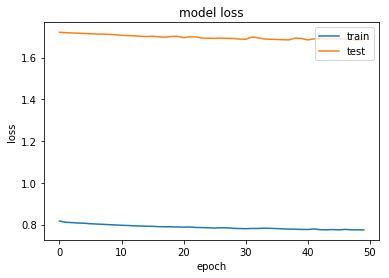

In [184]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [185]:
predictions = autoencoder.predict(data)

In [186]:
pre =pd.DataFrame(predictions)
pre

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.030980
1,17.394907,11.682691,0.0,0.0,0.0,0.0,24.161404,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.032080
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.057759
4,3.642887,4.014721,0.0,0.0,0.0,0.0,4.837417,0.000000
5,0.668784,1.335244,0.0,0.0,0.0,0.0,1.051190,0.000000
6,1.814284,2.371563,0.0,0.0,0.0,0.0,2.507833,0.000000
7,0.000000,0.136568,0.0,0.0,0.0,0.0,0.000000,0.000000
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021294
9,0.000000,0.040859,0.0,0.0,0.0,0.0,0.000000,0.000263


In [187]:
#score 2
s2 = abs(data - predictions)
s2['s2'] = s2.sum(axis=1)
s2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,s2
0,0.192739,0.179375,0.082846,0.190877,0.212950,0.401722,0.127639,0.028381,1.416530
1,11.884264,24.143682,16.481821,17.625280,18.551686,2.287186,40.744563,152.154805,283.873287
2,0.000228,0.095605,0.024615,0.108289,0.180240,0.029779,0.021096,0.687051,1.146903
3,0.012504,0.070096,0.027683,0.116863,0.084957,0.016100,0.057403,0.240690,0.626296
4,1.530280,5.067777,1.647798,1.493659,2.905388,4.527378,0.004110,0.887539,18.063928


In [241]:
#bin2
s2['bin2'] = s2['s2'].rank(ascending=1)
s2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,s2,bin2
0,0.192739,0.179375,0.082846,0.190877,0.212950,0.401722,0.127639,0.028381,1.416530,1029068.0
1,11.884264,24.143682,16.481821,17.625280,18.551686,2.287186,40.744563,152.154805,283.873287,1070954.0
2,0.000228,0.095605,0.024615,0.108289,0.180240,0.029779,0.021096,0.687051,1.146903,1017779.0
3,0.012504,0.070096,0.027683,0.116863,0.084957,0.016100,0.057403,0.240690,0.626296,961261.0
4,1.530280,5.067777,1.647798,1.493659,2.905388,4.527378,0.004110,0.887539,18.063928,1069852.0


In [242]:
result = pd.concat([ppdf, s2], axis=1, join_axes=[ppdf.index])

In [246]:
result

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,S1,bin1,...,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,s2,bin2
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599,1.390748,1027760.0,...,0.192739,0.179375,0.082846,0.190877,0.212950,0.401722,0.127639,0.028381,1.416530,1029068.0
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805,337.112288,1070958.0,...,11.884264,24.143682,16.481821,17.625280,18.551686,2.287186,40.744563,152.154805,283.873287,1070954.0
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971,1.114823,1014919.0,...,0.000228,0.095605,0.024615,0.108289,0.180240,0.029779,0.021096,0.687051,1.146903,1017779.0
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931,0.568537,862546.0,...,0.012504,0.070096,0.027683,0.116863,0.084957,0.016100,0.057403,0.240690,0.626296,961261.0
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539,22.521292,1070033.0,...,1.530280,5.067777,1.647798,1.493659,2.905388,4.527378,0.004110,0.887539,18.063928,1069852.0
5,1.390779,-0.289464,0.458260,-0.489314,-0.670298,-1.248913,1.253489,-0.486061,6.286577,1062522.0,...,0.721995,1.624708,0.458260,0.489314,0.670298,1.248913,0.202299,0.486061,5.901847,1063774.0
6,2.635931,-0.829893,0.848934,-0.800983,-1.561834,-2.426161,2.335509,0.187424,11.626669,1068158.0,...,0.821647,3.201457,0.848934,0.800983,1.561834,2.426161,0.172325,0.187424,10.020764,1068180.0
7,0.209052,0.213620,0.066156,-0.216701,0.035541,0.225827,0.094611,-1.133559,2.195067,1042374.0,...,0.209052,0.077052,0.066156,0.216701,0.035541,0.225827,0.094611,1.133559,2.058499,1041708.0
8,0.009569,0.159572,0.033680,-0.022511,0.105585,0.065331,-0.012713,-0.973464,1.382427,1027484.0,...,0.009569,0.159572,0.033680,0.022511,0.105585,0.065331,0.012713,0.994759,1.403721,1028615.0
9,0.039489,0.291285,0.044127,0.006781,0.104170,0.100987,0.035794,-1.431784,2.054418,1040697.0,...,0.039489,0.250426,0.044127,0.006781,0.104170,0.100987,0.035794,1.432047,2.013822,1041134.0


In [247]:
result['final'] = result.apply(lambda x: x['bin1'] + x['bin2'], axis=1)

In [248]:
result

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,S1,bin1,...,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,s2,bin2,final
0,0.192739,-0.179375,0.082846,-0.190877,-0.212950,0.401722,0.127639,0.002599,1.390748,1027760.0,...,0.179375,0.082846,0.190877,0.212950,0.401722,0.127639,0.028381,1.416530,1029068.0,2056828.0
1,29.279171,35.826372,16.481821,17.625280,-18.551686,2.287186,64.905966,-152.154805,337.112288,1070958.0,...,24.143682,16.481821,17.625280,18.551686,2.287186,40.744563,152.154805,283.873287,1070954.0,2141912.0
2,-0.000228,0.095605,0.024615,-0.108289,0.180240,0.029779,-0.021096,-0.654971,1.114823,1014919.0,...,0.095605,0.024615,0.108289,0.180240,0.029779,0.021096,0.687051,1.146903,1017779.0,2032698.0
3,0.012504,-0.070096,0.027683,-0.116863,0.084957,0.016100,-0.057403,-0.182931,0.568537,862546.0,...,0.070096,0.027683,0.116863,0.084957,0.016100,0.057403,0.240690,0.626296,961261.0,1823807.0
4,5.173167,-1.053056,1.647798,-1.493659,-2.905388,-4.527378,4.833308,-0.887539,22.521292,1070033.0,...,5.067777,1.647798,1.493659,2.905388,4.527378,0.004110,0.887539,18.063928,1069852.0,2139885.0
5,1.390779,-0.289464,0.458260,-0.489314,-0.670298,-1.248913,1.253489,-0.486061,6.286577,1062522.0,...,1.624708,0.458260,0.489314,0.670298,1.248913,0.202299,0.486061,5.901847,1063774.0,2126296.0
6,2.635931,-0.829893,0.848934,-0.800983,-1.561834,-2.426161,2.335509,0.187424,11.626669,1068158.0,...,3.201457,0.848934,0.800983,1.561834,2.426161,0.172325,0.187424,10.020764,1068180.0,2136338.0
7,0.209052,0.213620,0.066156,-0.216701,0.035541,0.225827,0.094611,-1.133559,2.195067,1042374.0,...,0.077052,0.066156,0.216701,0.035541,0.225827,0.094611,1.133559,2.058499,1041708.0,2084082.0
8,0.009569,0.159572,0.033680,-0.022511,0.105585,0.065331,-0.012713,-0.973464,1.382427,1027484.0,...,0.159572,0.033680,0.022511,0.105585,0.065331,0.012713,0.994759,1.403721,1028615.0,2056099.0
9,0.039489,0.291285,0.044127,0.006781,0.104170,0.100987,0.035794,-1.431784,2.054418,1040697.0,...,0.250426,0.044127,0.006781,0.104170,0.100987,0.035794,1.432047,2.013822,1041134.0,2081831.0


In [254]:
result10 = result.sort_values(by = ['final'],ascending=False)
result10['record'].head(10)

632815      632816
1067359    1067360
67128        67129
565391      565392
585117      585118
585119      585120
917941      917942
585438      585439
920627      920628
293329      293330
Name: record, dtype: int64

In [211]:
import csv
result10.to_csv('~/Desktop/562/result10.csv')

In [212]:
result10 = result10[result10['final'] == 1998]

In [213]:
result10.to_csv('~/Desktop/562/result10.csv')

In [219]:
import seaborn as sns
sns.set(style="darkgrid")
#plot = sns.load_dataset("titanic")
ax = seaborn.countplot(x="final", data=result10)

NameError: name 'seaborn' is not defined

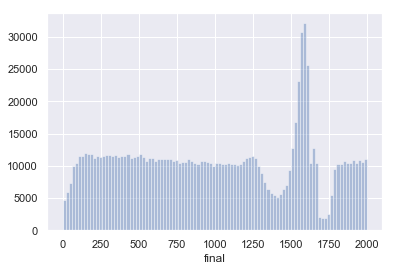

In [224]:
ax = sns.distplot(result10['final'],bins=100, kde=False)
#ax.set_yscale('log')
#plt.savefig('log.png')

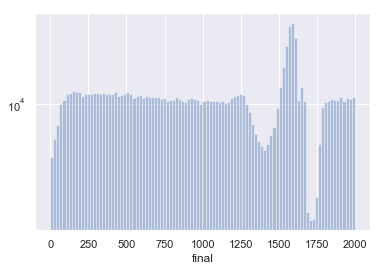

In [225]:
ax = sns.distplot(result10['final'],bins=100, kde=False)
ax.set_yscale('log')
#plt.savefig('log.png')

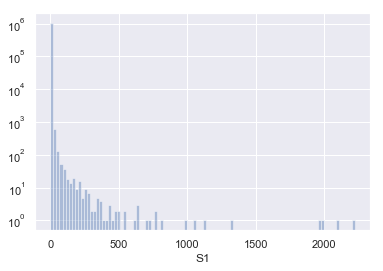

In [228]:
ax = sns.distplot(result10['S1'],bins=100, kde=False)
ax.set_yscale('log')
#plt.savefig('log.png')

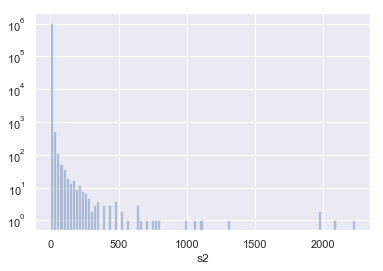

In [229]:
ax = sns.distplot(result10['s2'],bins=100, kde=False)
ax.set_yscale('log')
#plt.savefig('log.png')

In [230]:
import csv
result10.to_csv('~/Desktop/562/result10_full.csv')